In [2]:
#ML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
data1= pd.read_csv(r'C:\Input\FuelConsumptionCo2.csv')

In [12]:
data1.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [37]:
#Simple regressional analysis

In [38]:
data1=data1[["ENGINESIZE","CO2EMISSIONS"]]

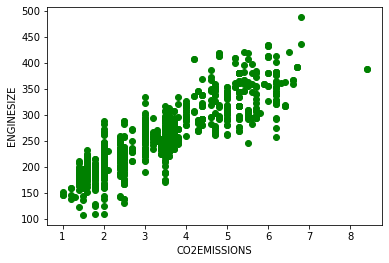

In [17]:
plt.scatter(data1["ENGINESIZE"],data1["CO2EMISSIONS"],color='g')
plt.xlabel("CO2EMISSIONS")
plt.ylabel("ENGINESIZE")
plt.show()

In [7]:
#generating training and testing data. 
#using 80% data for training

train = data1[:(int((len(data1)*0.8)))]
test = data1[(int((len(data1)*0.8))):]

In [25]:
# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

# The coefficients:
print ('coefficients :' ,regr.coef_) #Slope
print ('Intercept : ',regr.intercept_) #Intercept

coefficients : [[38.79512384]]
Intercept :  [127.16989951]


Text(0, 0.5, 'Emission')

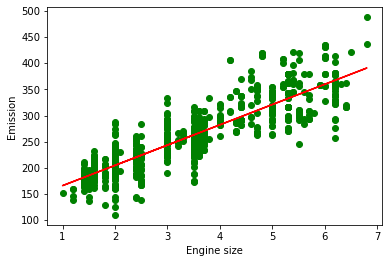

In [28]:
# Plotting the regression line:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='g')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')

In [29]:
# Predicting values:
# Function for predicting future values :
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values


In [30]:
# Predicting emission for future car:
my_engine_size = 3.5
estimatd_emission = get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print ('Estimated Emission :',estimatd_emission)


Estimated Emission : 262.9528329350172


In [34]:
# Checking various accuracy:
from sklearn.metrics import r2_score
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 20.60
Mean sum of squares (MSE): 746.45
R2-score: 0.71


In [39]:
#Multiple regressional analysis

In [44]:
# Consider features we want to work on:
X = data1[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 
 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
Y = data1['CO2EMISSIONS']

In [17]:
# Generating training and testing data from our data:
# We are using 80% data for training.
train = data1[:(int((len(data1)*0.8)))]
test = data1[(int((len(data1)*0.8))):]

In [19]:
#Modeling:
#Using sklearn package to model data:

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.array(train[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])

train_y = np.array(train['CO2EMISSIONS'])

test_x = np.array(test[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])

test_y = np.array(test['CO2EMISSIONS'])

regr.fit(train_x,train_y)


In [21]:
# print the coefficient values:
coeff_data = pd.DataFrame(regr.coef_ , X.columns , columns=['Coefficients'])
coeff_data


,Coefficients
ENGINESIZE,7.873147
CYLINDERS,8.408908
FUELCONSUMPTION_CITY,-3.368325
FUELCONSUMPTION_HWY,2.742498
FUELCONSUMPTION_COMB,3.851251
FUELCONSUMPTION_COMB_MPG,-4.082913


In [22]:
#Now let’s do prediction of data:
Y_pred = regr.predict(test_x)

In [23]:
# Check accuracy:
from sklearn.metrics import r2_score
R = r2_score(test_y , Y_pred)
print ("R² :",R)

R² : 0.9362912548588908


In [45]:
#For a polynomial regression

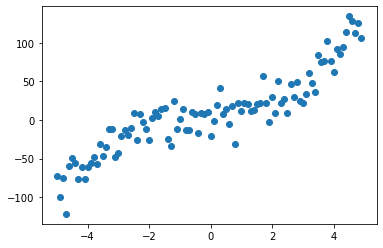

In [5]:
# Generate datapoints:
x = np.arange(-5,5,0.1)
y_noise = 20 * np.random.normal(size = len(x))
y = 1*(x**3) + 1*(x**2) + 1*x + 3+y_noise
plt.scatter(x,y)

In [6]:
# Make polynomial data:
x1 = x
x2 = np.power(x1,2)
x3 = np.power(x1,3)

In [15]:
#Co-efficient of beta-0 = 1
x_bias=np.ones((2,0))
x_bias

array([], shape=(2, 0), dtype=float64)